In [1]:
import re
import nltk
import pandas as pd
import math
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords, words
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from nltk import PorterStemmer
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy as nltk_accuracy

In [2]:
stopwords_list = nltk.corpus.stopwords.words('english')

In [3]:
train_data = pd.read_csv('train.csv')

In [4]:
train_data.head()

,sentiment,text
0,5,@manjulamartin @Kirk_Gleason Except trains are...
1,5,I want a Google driverless car.
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...
4,5,@google is making driverless cars which is awe...


In [5]:
train_data.tail()

,sentiment,text
976,1,Driverless cars ? What's the point ?
977,1,Driverless cars?!! Wth!i honestly don't think ...
978,1,Google developing a driverless car??? da facckk?!
979,1,Driverless Cars: Now Street-Legal in Californi...
980,1,@d3signerd Ì¢‰âÂå_being systematically run ove...


In [6]:
neg_reviews = train_data[train_data['sentiment'].isin([1, 2])]['text'].tolist()

In [7]:
neg_reviews[:5]

['@ForbesTech Why do they take great concepts for cars (driverless &amp; electric) and make them so intentionally unappealing..',
 'Hope we hang on to Right to Drive "vindugoel: GoogleÌ¢‰âÂ‰ã¢s Next Driverless Cars: No Brakes or Steering Wheel http://t.co/ukeUDvMQvj #codeconÌ¢‰âÂå\x9d',
 "I just woke up from falling asleep on the couch; had the craziest dream that Google made driverless cars... Say it ain't so...",
 'A look at the roadblocks facing driverless cars http://t.co/i5pYvYAKmb',
 "#hooli did it first.RT @nytimes: Google's newest driverless car has no wheel or pedal and 2 buttons: start and panic http://t.co/R1SHVzTqWuÌ¢‰âÂå\x9d"]

In [8]:
neutral_reviews = train_data[train_data['sentiment'] == 3]['text'].tolist()

In [9]:
neutral_reviews[:5]

['When the time came, I knew it\'d look like an egg - @Dezeen: Google unveils "driverless" car: http://t.co/1n5cLVfEsj http://t.co/JJ8I4WoCgp',
 '@edwardboches Nope, because Google invested $258m in Uber. They will *have* the driverless cars ;) http://t.co/BHmre3MIl9',
 "Google's driverless cars - no brakes or steering wheel - coming to streets this year. http://t.co/JxPfKCzOxc (Google) http://t.co/Uqx9xELqRG",
 '@uplift17 driverless cars are supposed to be taxis, though. Not personal vehicles.',
 'Funny to think texting and driving with no hands is in our future thx to @google Driverless Cars.  http://t.co/KTemFZEgsX']

In [10]:
pos_reviews = train_data[train_data['sentiment'].isin([4, 5])]['text'].tolist()

In [11]:
pos_reviews[:5]

['@manjulamartin @Kirk_Gleason Except trains are very capital intensive and have limited mobility. Driverless cars are the best of both worlds',
 'I want a Google driverless car.',
 '@Oatmeal @google driverless @TeslaMotors ? Ooooh that would be awesome!!',
 'SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ‰ã¢s Next Phase in Driverless Cars via @nytimes http://t.co/vo7qk0YQdP',
 '@google is making driverless cars which is awesome http://t.co/t2hW30KzcX']

In [12]:
# Preprocessing functions
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords, numeric and punctuations
    tokens = [(word.lower()) for word in tokens if word.isalpha() and (word.lower() not in stopwords_list)]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

In [13]:
processed_neg_reviews = [preprocess_text(review) for review in neg_reviews]
processed_neutral_reviews = [preprocess_text(review) for review in neutral_reviews]
processed_pos_reviews = [preprocess_text(review) for review in pos_reviews]

In [14]:
print('Negative reviews:',processed_neg_reviews[:5])

Negative reviews: [['forbestech', 'take', 'great', 'concept', 'car', 'driverless', 'amp', 'electric', 'make', 'intentionally', 'unappealing'], ['hope', 'hang', 'right', 'drive', 'vindugoel', 'next', 'driverless', 'car', 'brake', 'steering', 'wheel'], ['woke', 'falling', 'asleep', 'couch', 'craziest', 'dream', 'google', 'made', 'driverless', 'car', 'say', 'ai'], ['look', 'roadblock', 'facing', 'driverless', 'car'], ['hooli', 'nytimes', 'google', 'newest', 'driverless', 'car', 'wheel', 'pedal', 'button', 'start', 'panic']]


In [15]:
print('Neutral reviews:',processed_neutral_reviews[:5])

Neutral reviews: [['time', 'came', 'knew', 'look', 'like', 'egg', 'dezeen', 'google', 'unveils', 'driverless', 'car'], ['edwardboches', 'nope', 'google', 'invested', 'uber', 'driverless', 'car'], ['google', 'driverless', 'car', 'brake', 'steering', 'wheel', 'coming', 'street', 'year', 'google'], ['driverless', 'car', 'supposed', 'taxi', 'though', 'personal', 'vehicle'], ['funny', 'think', 'texting', 'driving', 'hand', 'future', 'thx', 'google', 'driverless', 'car']]


In [16]:
print('Positive reviews:',processed_pos_reviews[:5])

Positive reviews: [['manjulamartin', 'except', 'train', 'capital', 'intensive', 'limited', 'mobility', 'driverless', 'car', 'best', 'world'], ['want', 'google', 'driverless', 'car'], ['oatmeal', 'google', 'driverless', 'teslamotors', 'ooooh', 'would', 'awesome'], ['much', 'awesome', 'amazing', 'video', 'next', 'phase', 'driverless', 'car', 'via', 'nytimes'], ['google', 'making', 'driverless', 'car', 'awesome']]


In [17]:
# Naive Bayes Classifier

In [18]:
def create_doc(train_data):
    final = []
    for loop in range(0,len(train_data),1):
        review_sent = []
        review = []
        review.extend(word_tokenize(train_data['text_clean'][loop]))
        review_sent.append(review)
        review_sent.append(train_data['sentiment'][loop])
        final.append(review_sent)
    return final

In [19]:
# Combine the data and create labels
all_reviews = processed_neg_reviews + processed_neutral_reviews + processed_pos_reviews
labels = (["neg"] * len(processed_neg_reviews)
        + ["neutral"] * len(processed_neutral_reviews)
        + ["pos"] * len(processed_pos_reviews))

In [20]:
all_reviews[:5]

[['forbestech',
  'take',
  'great',
  'concept',
  'car',
  'driverless',
  'amp',
  'electric',
  'make',
  'intentionally',
  'unappealing'],
 ['hope',
  'hang',
  'right',
  'drive',
  'vindugoel',
  'next',
  'driverless',
  'car',
  'brake',
  'steering',
  'wheel'],
 ['woke',
  'falling',
  'asleep',
  'couch',
  'craziest',
  'dream',
  'google',
  'made',
  'driverless',
  'car',
  'say',
  'ai'],
 ['look', 'roadblock', 'facing', 'driverless', 'car'],
 ['hooli',
  'nytimes',
  'google',
  'newest',
  'driverless',
  'car',
  'wheel',
  'pedal',
  'button',
  'start',
  'panic']]

In [21]:
all_words = [word for sublist in all_reviews for word in sublist]

In [22]:
all_words_fd = nltk.FreqDist(w.lower() for w in all_words if w.isalpha() and (w.lower() not in stopwords_list))

In [23]:
word_features = list(all_words_fd)[:2000]

In [24]:
word_features[:20]

['car',
 'driverless',
 'google',
 'future',
 'california',
 'road',
 'one',
 'could',
 'driver',
 'via',
 'ca',
 'like',
 'rt',
 'make',
 'drive',
 'wheel',
 'think',
 'would',
 'get',
 'amp']

In [25]:
# Convert tokenized reviews into featuresets
def extract_features(tokens):
    cust_rev = set(tokens) #3
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in cust_rev)
    return features
    # Here we simply mark each word as a True feature
    #return {word: True for word in tokens}

In [26]:
featuresets = [(extract_features(tokens), label) for tokens, label in zip(all_reviews, labels)]

In [27]:
featuresets[:2]

[({'contains(car)': True,
   'contains(driverless)': True,
   'contains(google)': False,
   'contains(future)': False,
   'contains(california)': False,
   'contains(road)': False,
   'contains(one)': False,
   'contains(could)': False,
   'contains(driver)': False,
   'contains(via)': False,
   'contains(ca)': False,
   'contains(like)': False,
   'contains(rt)': False,
   'contains(make)': True,
   'contains(drive)': False,
   'contains(wheel)': False,
   'contains(think)': False,
   'contains(would)': False,
   'contains(get)': False,
   'contains(amp)': True,
   'contains(vehicle)': False,
   'contains(new)': False,
   'contains(year)': False,
   'contains(uber)': False,
   'contains(take)': True,
   'contains(u)': False,
   'contains(people)': False,
   'contains(driving)': False,
   'contains(time)': False,
   'contains(technology)': False,
   'contains(steering)': False,
   'contains(want)': False,
   'contains(go)': False,
   'contains(need)': False,
   'contains(le)': False,
 

In [28]:
# Shuffle data
random.shuffle(featuresets)

In [29]:
#Split into train and test datasets
train_set, test_set = train_test_split(featuresets, test_size=0.2, random_state=42)

In [30]:
# Train Naive Bayes Classifier
classifier = NaiveBayesClassifier.train(train_set)

In [31]:
# Calculate accuracy
print("Accuracy:", nltk_accuracy(classifier, test_set))

Accuracy: 0.5888324873096447


In [32]:
classifier.show_most_informative_features(15)

Most Informative Features
           contains(fbi) = True              neg : neutra =     27.1 : 1.0
         contains(trust) = True              neg : neutra =     15.7 : 1.0
          contains(used) = True              neg : neutra =     15.7 : 1.0
       contains(awesome) = True              pos : neutra =     11.0 : 1.0
       contains(excited) = True              pos : neutra =     11.0 : 1.0
          contains(fuel) = True              neg : neutra =     10.0 : 1.0
         contains(issue) = True              neg : neutra =     10.0 : 1.0
         contains(story) = True              neg : neutra =     10.0 : 1.0
          contains(good) = True              pos : neutra =      9.6 : 1.0
        contains(around) = True              pos : neutra =      9.3 : 1.0
          contains(away) = True              neg : neutra =      7.7 : 1.0
         contains(crash) = True              neg : neutra =      7.7 : 1.0
           contains(put) = True              neg : neutra =      7.7 : 1.0

In [33]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [34]:
y_true = [label for (_, label) in test_set]
y_pred = [classifier.classify(features) for (features, _) in test_set]

In [35]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         neg       0.70      0.25      0.37        28
     neutral       0.71      0.74      0.73       121
         pos       0.31      0.40      0.35        48

    accuracy                           0.59       197
   macro avg       0.58      0.46      0.48       197
weighted avg       0.61      0.59      0.58       197



In [36]:
# Now using the trained model to predict on unseen data
test_data = pd.read_csv('test.csv')

In [37]:
test_data.head()

,id,text
0,1,Two places I'd invest all my money if I could:...
1,2,Awesome! Google driverless cars will help the ...
2,3,Autonomous vehicles could reduce traffic fatal...
3,4,Really good presentation from Jan Becker on Bo...
4,5,Ford just revealed it's Automated Ford Fusion ...


In [38]:
print(test_data['text'][0])

Two places I'd invest all my money if I could: 3D printing and Self-driving cars!!!


In [39]:
new_review = word_tokenize(test_data['text'][0])
print("Predicted Sentiment:", classifier.classify(extract_features(new_review)))

Predicted Sentiment: neutral


In [40]:
# topic modelling - cumulative frequency plot

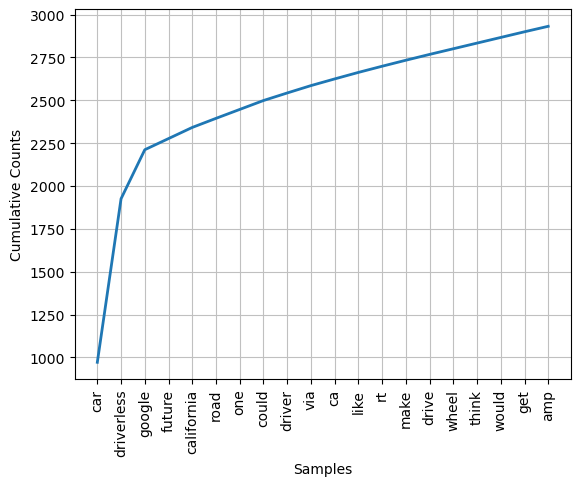

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [41]:
all_words_fd.plot(20, cumulative=True)

In [42]:
# topic modelling - word cloud

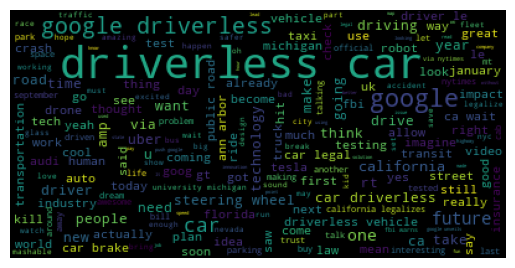

In [43]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

all_words_wc = ' '.join(all_words)

word_cloud_1a = WordCloud(random_state=42).generate(all_words_wc)

plt.imshow(word_cloud_1a)
plt.axis("off")
plt.show()

In [44]:
# topic modelling - LDA

In [45]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
import string

In [46]:
# Preprocess but do not tokenize
def preprocess_text_1(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords, numeric and punctuations
    tokens = [(word.lower()) for word in tokens if word.isalpha()]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [47]:
processed_pos_reviews_1 = [preprocess_text_1(review) for review in pos_reviews]

In [48]:
processed_neg_reviews_1 = [preprocess_text_1(review) for review in neg_reviews]

In [49]:
processed_neu_reviews_1 = [preprocess_text_1(review) for review in neutral_reviews]

In [50]:
all_prep_reviews = processed_neg_reviews_1 + processed_neu_reviews_1 + processed_pos_reviews_1

In [51]:
def preprocessd(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove stopwords, punctuation, and non-alphabetic tokens
    tokens = [word for word in tokens if word not in stopwords_list and word not in string.punctuation and word.isalpha()]
    return tokens

processed_docs = [preprocessd(doc) for doc in all_prep_reviews]
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


num_topics = 5  # Number of topics to extract
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

# Step 4: Display Topics
for i, topic in lda_model.print_topics(num_words=5):
    print(f"Topic {i}: {topic}")

Topic 0: 0.066*"car" + 0.065*"driverless" + 0.013*"google" + 0.012*"future" + 0.006*"le"
Topic 1: 0.031*"car" + 0.030*"driverless" + 0.012*"people" + 0.007*"uber" + 0.005*"future"
Topic 2: 0.088*"driverless" + 0.087*"car" + 0.012*"google" + 0.009*"driver" + 0.008*"one"
Topic 3: 0.076*"driverless" + 0.067*"car" + 0.017*"google" + 0.015*"could" + 0.007*"michigan"
Topic 4: 0.098*"car" + 0.090*"driverless" + 0.043*"google" + 0.010*"california" + 0.007*"via"


In [52]:
# text summarization

In [53]:
processed_pos_reviews_1[:5]

['manjulamartin except train are very capital intensive and have limited mobility driverless car are the best of both world',
 'i want a google driverless car',
 'oatmeal google driverless teslamotors ooooh that would be awesome',
 'so much awesome amazing video for next phase in driverless car via nytimes',
 'google is making driverless car which is awesome']

In [54]:
sentences = nltk.sent_tokenize(str(processed_neu_reviews_1))
total_documents = len(sentences)

In [55]:
def _create_frequency_matrix(sentences):
    frequency_matrix = {}
    stopWords = set(nltk.corpus.stopwords.words("english"))
    ps = PorterStemmer()

    for sent in sentences:
        freq_table = {}
        words = word_tokenize(sent)
        for word in words:
            word = word.lower()
            word = ps.stem(word)
            if word in stopWords:
                continue

            if word in freq_table:
                freq_table[word] += 1
            else:
                freq_table[word] = 1

        frequency_matrix[sent[:15]] = freq_table
    return frequency_matrix

In [56]:
freq_matrix = _create_frequency_matrix(processed_pos_reviews_1)
print(freq_matrix)

{'manjulamartin e': {'manjulamartin': 1, 'except': 1, 'train': 1, 'veri': 1, 'capit': 1, 'intens': 1, 'limit': 1, 'mobil': 1, 'driverless': 1, 'car': 1, 'best': 1, 'world': 1}, 'i want a google': {'want': 1, 'googl': 1, 'driverless': 1, 'car': 1}, 'oatmeal google ': {'oatmeal': 1, 'googl': 1, 'driverless': 1, 'teslamotor': 1, 'ooooh': 1, 'would': 1, 'awesom': 1}, 'so much awesome': {'much': 1, 'awesom': 1, 'amaz': 1, 'video': 1, 'next': 1, 'phase': 1, 'driverless': 1, 'car': 1, 'via': 1, 'nytim': 1}, 'google is makin': {'googl': 1, 'make': 1, 'driverless': 1, 'car': 1, 'awesom': 1}, 'you could call ': {'could': 1, 'call': 1, 'driverless': 1, 'car': 2, 'tell': 1, 'take': 1, 'whoo': 1, 'hoo': 1}, 'marketplace goo': {'marketplac': 1, 'googl': 1, 'driverless': 1, 'car': 1, 'take': 1, 'one': 1, 'randomtap': 1}, 'driverless taxi': {'driverless': 1, 'taxi': 1, 'nyc': 1, 'would': 1, 'probabl': 1, 'amaz': 1, 'applic': 1}, 'this whole goog': {'thi': 1, 'whole': 1, 'googl': 1, 'driverless': 1, 'c

In [57]:
def _create_tf_matrix(freq_matrix):
    tf_matrix = {}

    for sent, f_table in freq_matrix.items():
        tf_table = {}

        count_words_in_sentence = len(f_table)
        for word, count in f_table.items():
            tf_table[word] = count / count_words_in_sentence

        tf_matrix[sent] = tf_table

    return tf_matrix

In [58]:
tf_matrix = _create_tf_matrix(freq_matrix)
print(tf_matrix)

{'manjulamartin e': {'manjulamartin': 0.08333333333333333, 'except': 0.08333333333333333, 'train': 0.08333333333333333, 'veri': 0.08333333333333333, 'capit': 0.08333333333333333, 'intens': 0.08333333333333333, 'limit': 0.08333333333333333, 'mobil': 0.08333333333333333, 'driverless': 0.08333333333333333, 'car': 0.08333333333333333, 'best': 0.08333333333333333, 'world': 0.08333333333333333}, 'i want a google': {'want': 0.25, 'googl': 0.25, 'driverless': 0.25, 'car': 0.25}, 'oatmeal google ': {'oatmeal': 0.14285714285714285, 'googl': 0.14285714285714285, 'driverless': 0.14285714285714285, 'teslamotor': 0.14285714285714285, 'ooooh': 0.14285714285714285, 'would': 0.14285714285714285, 'awesom': 0.14285714285714285}, 'so much awesome': {'much': 0.1, 'awesom': 0.1, 'amaz': 0.1, 'video': 0.1, 'next': 0.1, 'phase': 0.1, 'driverless': 0.1, 'car': 0.1, 'via': 0.1, 'nytim': 0.1}, 'google is makin': {'googl': 0.2, 'make': 0.2, 'driverless': 0.2, 'car': 0.2, 'awesom': 0.2}, 'you could call ': {'could

In [59]:
def _create_documents_per_words(freq_matrix):
    word_per_doc_table = {}

    for sent, f_table in freq_matrix.items():
        for word, count in f_table.items():
            if word in word_per_doc_table:
                word_per_doc_table[word] += 1
            else:
                word_per_doc_table[word] = 1

    return word_per_doc_table

In [60]:
count_doc_per_words = _create_documents_per_words(freq_matrix)
print(count_doc_per_words)

{'manjulamartin': 1, 'except': 1, 'train': 1, 'veri': 5, 'capit': 1, 'intens': 1, 'limit': 3, 'mobil': 4, 'driverless': 202, 'car': 182, 'best': 4, 'world': 3, 'want': 12, 'googl': 67, 'oatmeal': 1, 'teslamotor': 1, 'ooooh': 1, 'would': 11, 'awesom': 5, 'much': 6, 'amaz': 4, 'video': 3, 'next': 3, 'phase': 1, 'via': 5, 'nytim': 2, 'make': 12, 'could': 11, 'call': 2, 'tell': 3, 'take': 7, 'whoo': 1, 'hoo': 1, 'marketplac': 1, 'one': 13, 'randomtap': 1, 'taxi': 3, 'nyc': 2, 'probabl': 5, 'applic': 1, 'thi': 26, 'whole': 1, 'prototyp': 2, 'thing': 8, 'new': 3, 'ha': 9, 'brake': 2, 'pedal': 4, 'steer': 4, 'wheel': 7, 'huffposttech': 1, 'fantast': 2, 'ride': 4, 'bucket': 1, 'list': 1, 'damn': 2, 'excit': 8, 'futur': 14, 'oh': 2, 'place': 1, 'go': 10, 'ca': 17, 'wait': 13, 'scichat': 1, 'nicolelapin': 1, 'great': 2, 'idea': 3, 'someon': 1, 'like': 7, 'eye': 1, 'condit': 1, 'unabl': 1, 'drive': 19, 'whi': 6, 'need': 6, 'develop': 2, 'fuck': 2, 'chill': 1, 'wokvnew': 1, 'russellanjax': 1, 'soo

In [61]:
def _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents):
    idf_matrix = {}

    for sent, f_table in freq_matrix.items():
        idf_table = {}

        for word in f_table.keys():
            idf_table[word] = math.log10(total_documents / float(count_doc_per_words[word]))

        idf_matrix[sent] = idf_table

    return idf_matrix

In [62]:
idf_matrix = _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents)
print(idf_matrix)

{'manjulamartin e': {'manjulamartin': 0.0, 'except': 0.0, 'train': 0.0, 'veri': -0.6989700043360187, 'capit': 0.0, 'intens': 0.0, 'limit': -0.47712125471966244, 'mobil': -0.6020599913279624, 'driverless': -2.305351369446624, 'car': -2.2600713879850747, 'best': -0.6020599913279624, 'world': -0.47712125471966244}, 'i want a google': {'want': -1.0791812460476249, 'googl': -1.8260748027008264, 'driverless': -2.305351369446624, 'car': -2.2600713879850747}, 'oatmeal google ': {'oatmeal': 0.0, 'googl': -1.8260748027008264, 'driverless': -2.305351369446624, 'teslamotor': 0.0, 'ooooh': 0.0, 'would': -1.041392685158225, 'awesom': -0.6989700043360187}, 'so much awesome': {'much': -0.7781512503836436, 'awesom': -0.6989700043360187, 'amaz': -0.6020599913279624, 'video': -0.47712125471966244, 'next': -0.47712125471966244, 'phase': 0.0, 'driverless': -2.305351369446624, 'car': -2.2600713879850747, 'via': -0.6989700043360187, 'nytim': -0.3010299956639812}, 'google is makin': {'googl': -1.8260748027008

In [63]:
def _create_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}

    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):

        tf_idf_table = {}

        for (word1, value1), (word2, value2) in zip(f_table1.items(),
                                                    f_table2.items()):  # here, keys are the same in both the table
            tf_idf_table[word1] = float(value1 * value2)

        tf_idf_matrix[sent1] = tf_idf_table

    return tf_idf_matrix

In [64]:
tf_idf_matrix = _create_tf_idf_matrix(tf_matrix, idf_matrix)
print(tf_idf_matrix)

{'manjulamartin e': {'manjulamartin': 0.0, 'except': 0.0, 'train': 0.0, 'veri': -0.05824750036133489, 'capit': 0.0, 'intens': 0.0, 'limit': -0.039760104559971865, 'mobil': -0.050171665943996864, 'driverless': -0.19211261412055197, 'car': -0.18833928233208955, 'best': -0.050171665943996864, 'world': -0.039760104559971865}, 'i want a google': {'want': -0.2697953115119062, 'googl': -0.4565187006752066, 'driverless': -0.576337842361656, 'car': -0.5650178469962687}, 'oatmeal google ': {'oatmeal': 0.0, 'googl': -0.2608678289572609, 'driverless': -0.32933590992094625, 'teslamotor': 0.0, 'ooooh': 0.0, 'would': -0.14877038359403214, 'awesom': -0.09985285776228839}, 'so much awesome': {'much': -0.07781512503836437, 'awesom': -0.06989700043360188, 'amaz': -0.06020599913279624, 'video': -0.047712125471966245, 'next': -0.047712125471966245, 'phase': 0.0, 'driverless': -0.2305351369446624, 'car': -0.22600713879850748, 'via': -0.06989700043360188, 'nytim': -0.03010299956639812}, 'google is makin': {'

In [65]:
def _score_sentences(tf_idf_matrix) -> dict:
    """
    score a sentence by its word's TF
    Basic algorithm: adding the TF frequency of every non-stop word in a sentence divided by total no of words in a sentence.
    :rtype: dict
    """

    sentenceValue = {}

    for sent, f_table in tf_idf_matrix.items():
        total_score_per_sentence = 0
        count_words_in_sentence = len(f_table)
        for word, score in f_table.items():
            total_score_per_sentence += score

        sentenceValue[sent] = total_score_per_sentence / count_words_in_sentence

    return sentenceValue

In [66]:
try:
    sentence_scores = _score_sentences(tf_idf_matrix)
except ZeroDivisionError:
    print("Error: Division by zero is not allowed.")

In [67]:
def _find_average_score(sentenceValue) -> int:
    """
    Find the average score from the sentence value dictionary
    :rtype: int
    """
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original summary_text
    average = (sumValues / len(sentenceValue))

    return average

In [68]:
threshold = _find_average_score(sentence_scores)
print(threshold)

-0.10744287526914095


In [69]:
def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:15] in sentenceValue and sentenceValue[sentence[:15]] >= (threshold):
            summary += " " + sentence
            sentence_count += 1
    return summary

In [70]:
summary = _generate_summary(sentences, sentence_scores, threshold)

In [71]:
print(summary)